In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
lapse = pd.read_csv('lapse_analysis.csv',index_col=0)

In [3]:
lapse.info()
#发现有空值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113361 entries, 1 to 113361
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   guid              113361 non-null  object 
 1   lapse_flag        113361 non-null  int64  
 2   architecture      113361 non-null  int64  
 3   sys_major         113361 non-null  int64  
 4   sys_sp            113361 non-null  int64  
 5   start_date_num    112104 non-null  float64
 6   normal_start_num  112104 non-null  float64
 7   last_start_date   112104 non-null  float64
 8   first_start_date  112104 non-null  float64
 9   user_start_num    112104 non-null  float64
 10  func_detail_num   103794 non-null  float64
 11  use_func_date     103794 non-null  float64
 12  last_func_date    103794 non-null  float64
 13  first_func_date   103794 non-null  float64
 14  use_func_num      103794 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 13.8+ MB


In [14]:
# 删除首次启动日期和首次使用日期变量下的空值
lapse = lapse.dropna(subset=['first_start_date','first_func_date'])

In [15]:
# 创建最近启动和最近使用变量(数据日期20201102)
lapse['start_recency']=lapse['last_start_date']-20201102
lapse['func_recency']=lapse['last_func_date']-20201102

In [6]:
# 计算flag0和1的占比
lapse.lapse_flag.value_counts(1)

0    0.681738
1    0.318262
Name: lapse_flag, dtype: float64

In [7]:
# 计算各变量和流失flag的相关性
lapse_sample=lapse[["lapse_flag", "start_date_num", "user_start_num",
                    "func_detail_num", "use_func_num",'start_recency',
                    'func_recency']]
lapse_sample.corr()

,lapse_flag,start_date_num,user_start_num,func_detail_num,use_func_num,start_recency,func_recency
lapse_flag,1.000000,-0.703112,-0.139563,-0.266392,-0.119572,-0.723217,-0.515825
start_date_num,-0.703112,1.000000,0.203449,0.362559,0.174066,0.931237,0.680718
user_start_num,-0.139563,0.203449,1.000000,0.216747,0.218253,0.182749,0.166119
func_detail_num,-0.266392,0.362559,0.216747,1.000000,0.327825,0.343346,0.468689
use_func_num,-0.119572,0.174066,0.218253,0.327825,1.000000,0.155446,0.240634
start_recency,-0.723217,0.931237,0.182749,0.343346,0.155446,1.000000,0.706906
func_recency,-0.515825,0.680718,0.166119,0.468689,0.240634,0.706906,1.000000


<AxesSubplot:>

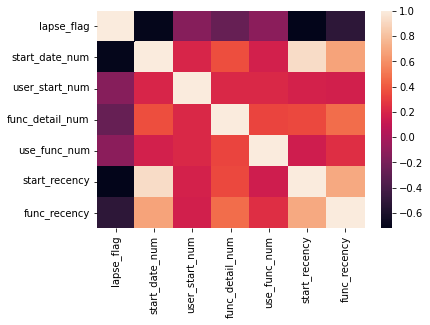

In [9]:
# 相关性可视化
sns.heatmap(lapse_sample.corr())

结果发现：
<br>启动次数越多，越不可能流失
<br>使用功能的次数越多，越不可能流失
<br>最近启动的时间距离第一次时间越长，越不可能流失

In [10]:
# 用labelencoder对sys_major做处理
# 导入LableEncoder模块
from sklearn.preprocessing import LabelEncoder

In [16]:
lapse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103333 entries, 2 to 113360
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   guid              103333 non-null  object 
 1   lapse_flag        103333 non-null  int64  
 2   architecture      103333 non-null  int64  
 3   sys_major         103333 non-null  int64  
 4   sys_sp            103333 non-null  int64  
 5   start_date_num    103333 non-null  float64
 6   normal_start_num  103333 non-null  float64
 7   last_start_date   103333 non-null  float64
 8   first_start_date  103333 non-null  float64
 9   user_start_num    103333 non-null  float64
 10  func_detail_num   103333 non-null  float64
 11  use_func_date     103333 non-null  float64
 12  last_func_date    103333 non-null  float64
 13  first_func_date   103333 non-null  float64
 14  use_func_num      103333 non-null  float64
 15  start_recency     103333 non-null  float64
 16  func_recency      10

In [17]:
lapse.head()

,guid,lapse_flag,architecture,sys_major,sys_sp,start_date_num,normal_start_num,last_start_date,first_start_date,user_start_num,func_detail_num,use_func_date,last_func_date,first_func_date,use_func_num,start_recency,func_recency
2,ece6d70e8,0,9,6,1,5.0,22.0,20201106.0,20201102.0,26.0,11.0,4.0,20201105.0,20201102.0,31.0,4.0,3.0
3,45dd78247,0,9,10,0,5.0,5.0,20201106.0,20201102.0,13.0,6.0,2.0,20201103.0,20201102.0,11.0,4.0,1.0
4,ff87641bd,0,9,10,0,5.0,27.0,20201106.0,20201102.0,32.0,7.0,3.0,20201106.0,20201102.0,28.0,4.0,4.0
7,0c6b3ece5,0,9,10,0,5.0,13.0,20201106.0,20201102.0,14.0,3.0,2.0,20201104.0,20201103.0,3.0,4.0,2.0
8,f84f63623,1,9,6,1,4.0,16.0,20201105.0,20201102.0,18.0,2.0,2.0,20201104.0,20201103.0,25.0,3.0,2.0


In [18]:
# 为了避免数字本身的影响，将数值型变量sys_major转为类别型变量
lapse['sys_major'] = lapse['sys_major'].astype('category')

In [19]:
# 将编码后的结果存储在新建的变量sys_encode中
sys_encode = LabelEncoder()

In [20]:
# 拟合并转化sys_major中的数据
lapse['sys_major'] = sys_encode.fit_transform(lapse.sys_major)

In [21]:
# 查看sys_major中不重复的版本号
lapse.sys_major.unique()

array([1, 2, 0])

In [22]:
# 用one hot coding来处理architecture
from sklearn.preprocessing import OneHotEncoder

In [23]:
# 将编码后的结果存储在新建的变量arc_one_hot中
arc_one_hot = OneHotEncoder()
arc_one_hot_encode = arc_one_hot.fit_transform(lapse.architecture.values.reshape(-1,1)).toarray()
ohe_variable = pd.DataFrame(arc_one_hot_encode, 
                            columns = ["arc_"+str(int(i)) 
                                       for i in range(arc_one_hot_encode.shape[1])])
lapse = pd.concat([lapse, ohe_variable], axis=1)
# 查看数据的具体变化
lapse.head()

,guid,lapse_flag,architecture,sys_major,sys_sp,start_date_num,normal_start_num,last_start_date,first_start_date,user_start_num,func_detail_num,use_func_date,last_func_date,first_func_date,use_func_num,start_recency,func_recency,arc_0,arc_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,ece6d70e8,0.0,9.0,1.0,1.0,5.0,22.0,20201106.0,20201102.0,26.0,11.0,4.0,20201105.0,20201102.0,31.0,4.0,3.0,0.0,1.0
3,45dd78247,0.0,9.0,2.0,0.0,5.0,5.0,20201106.0,20201102.0,13.0,6.0,2.0,20201103.0,20201102.0,11.0,4.0,1.0,0.0,1.0
4,ff87641bd,0.0,9.0,2.0,0.0,5.0,27.0,20201106.0,20201102.0,32.0,7.0,3.0,20201106.0,20201102.0,28.0,4.0,4.0,0.0,1.0


In [24]:
# 把不相关的变量删除
lapse=lapse.drop(['last_start_date','first_start_date',
                  'last_func_date','first_func_date','architecture','sys_sp'],axis=1)

In [25]:
##建模前
y=lapse['lapse_flag']     #提取因变量
X=lapse.drop(['guid','lapse_flag'],axis=1)
# 填充X、y中的空值
X=X.fillna(0)
y=y.fillna(0)

In [26]:
# 模型训练
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 100)

In [27]:
# 构建决策树
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [28]:
# 设置各项模型核心参数
dt = DecisionTreeClassifier(max_depth=3
                            ,min_samples_leaf=100
                            ,random_state=100)

In [29]:
# 拟合模型
dt = dt.fit(X_train, y_train)

In [31]:
# 给训练集的精度打分
dt_score_train=dt.score(X_train, y_train)
# 给测试集的精度打分
dt_score_test=dt.score(X_test, y_test)
print(dt_score_train)
print(dt_score_test)

0.873724974056544
0.8735900312998287


In [32]:
# 导入网格搜索模块
from sklearn.model_selection import GridSearchCV

In [34]:
# 设置参数
grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [50,80,100,120]
}
grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [35]:
# 再次拟合模型
grid_object.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=100,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [50, 80, 100, 120]},
             scoring='accuracy')

In [36]:
# 输出最优参数
grid_object.best_params_

{'max_depth': 5, 'min_samples_leaf': 100}

In [38]:
# 输入最佳参数，再次打分
dt = DecisionTreeClassifier(max_depth=5
                            ,min_samples_leaf=100
                            ,random_state=100)
dt = dt.fit(X_train, y_train)

In [39]:
dt_score_train=dt.score(X_train, y_train)  
dt_score_test=dt.score(X_test, y_test)
print(dt_score_train)
print(dt_score_test)

0.87626869827128
0.8756570011220693
